### Library import

In [25]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [26]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data_/summer/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)  #ignore_index = 기존 인덱스 무시하여 새로운 인덱스 생성(연속으로 이어진다)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200142 entries, 0 to 200141
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     200142 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      200142 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       200142 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      200142 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      200142 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      200142 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       200142 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       200142 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    200142 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    200142 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

### Data EDA

##### 1. rename

In [27]:
df.rename(columns={'CR_Datc_IncarSnsTemp_C': '내부 온도', 'CR_Datc_Humidity' : '습도', 
                   "Front_Seat_LH_Temp Unit: Degree ('c)" : '운전석 온도', "Front_Seat_RH_Temp Unit: Degree('c)" : '보조석 온도', 
                   "Rear_Seat_CT_Temp Unit: Degree('c)" : '뒷자석 온도(중앙)', "Front_Roof_CT_Temp Unit: Degree('c)" : '앞 루프 중앙',
                   "Front_Roof_LH_Temp Unit: Degree('c)": '앞 루프 좌측', "Front_Roof_RH_Temp Unit: Degree('c)" : '앞 루프 우측',
                   "Rear_Roof_LH_Temp Unit: Degree('c)": '뒷 루프 좌측', "Rear_Roof_RH_Temp Unit: Degree('c)": '뒷 루프 우측'}, inplace=True)

##### 2. describe

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,200142.0,22.959473,2.944476,14.10,20.900000,23.000000,25.30000,31.100000
보조석 온도,200142.0,22.710615,2.938477,14.10,20.700000,22.900000,24.90000,31.100000
뒷자석 온도(중앙),200142.0,21.697500,2.843739,13.70,19.600000,21.600000,23.90000,30.800000
앞 루프 중앙,200142.0,27.762230,4.692583,18.30,24.500000,26.700000,30.10000,48.200000
앞 루프 좌측,200142.0,28.373105,4.618123,19.60,25.200000,27.300000,30.80000,48.600000
앞 루프 우측,200142.0,27.755599,5.113194,17.70,24.200000,26.400000,30.00000,48.500000
뒷 루프 좌측,200142.0,27.548935,4.764914,18.70,24.100000,26.500000,30.40000,47.600000
뒷 루프 우측,200142.0,27.208955,4.308443,17.40,24.100000,26.400000,29.40000,44.000000
DRV_LH_Vent_Wind_Velocity Unit: m / s,200142.0,2.149231,1.123452,0.00,1.060000,2.130000,2.86000,6.350000
DRV_RH_Vent_Wind_Velocity Unit: m / s,200142.0,1.549637,1.047114,0.00,0.880000,1.510000,2.28000,7.540000


### 불쾌지수 측정을 위한 새로운 data frame 생성

In [29]:
df_summer = df[['운전석 온도', '습도']]

df_summer['RH'] = df_summer['습도'] / 100.0

df_summer['불쾌지수'] = 1.8 * df_summer['운전석 온도'] - 0.55 * (1 - df_summer['RH']) * (1.8 * df_summer['운전석 온도'] - 26) + 32

/tmp/ipykernel_79837/3315679178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['RH'] = df_summer['습도'] / 100.0
/tmp/ipykernel_79837/3315679178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['불쾌지수'] = 1.8 * df_summer['운전석 온도'] - 0.55 * (1 - df_summer['RH']) * (1.8 * df_summer['운전석 온도'] - 26) + 32


In [30]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200142 entries, 0 to 200141
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   운전석 온도  200142 non-null  float64
 1   습도      200142 non-null  float64
 2   RH      200142 non-null  float64
 3   불쾌지수    200142 non-null  float64
dtypes: float64(4)
memory usage: 6.1 MB


In [31]:
df_summer.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,200142.0,22.959473,2.944476,14.10000,20.90000,23.000,25.30000,31.100
습도,200142.0,35.189930,13.830431,10.50000,24.00000,33.000,44.50000,84.000
RH,200142.0,0.351899,0.138304,0.10500,0.24000,0.330,0.44500,0.840
불쾌지수,200142.0,67.883960,3.639778,57.57437,65.21188,68.105,70.34847,79.432


### df_summer 불쾌지수 범주화

- 0-60 : cold
- 60-68 : cool(쾌적)
- 68-71 : normal
- 71-75 : warm

In [32]:
bins = [0, 60, 68, 71, 75, float('inf')]
labels = ['cold', 'cool', 'normal', 'warm', 'hot']
df_summer['불쾌지수_범주'] = pd.cut(df_summer['불쾌지수'], bins=bins, labels=labels)

/tmp/ipykernel_79837/2651927576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['불쾌지수_범주'] = pd.cut(df_summer['불쾌지수'], bins=bins, labels=labels)


In [33]:
df_summer

,운전석 온도,습도,RH,불쾌지수,불쾌지수_범주
0,21.3,49.0,0.49,66.87863,cool
1,21.4,49.0,0.49,67.00814,cool
2,21.3,49.0,0.49,66.87863,cool
3,21.3,49.0,0.49,66.87863,cool
4,21.5,49.0,0.49,67.13765,cool
...,...,...,...,...,...
200137,25.0,35.0,0.35,70.20750,normal
200138,24.9,35.0,0.35,70.09185,normal
200139,24.8,35.0,0.35,69.97620,normal
200140,25.0,35.0,0.35,70.20750,normal


### 불쾌지수별 데이터 샘플 시각화

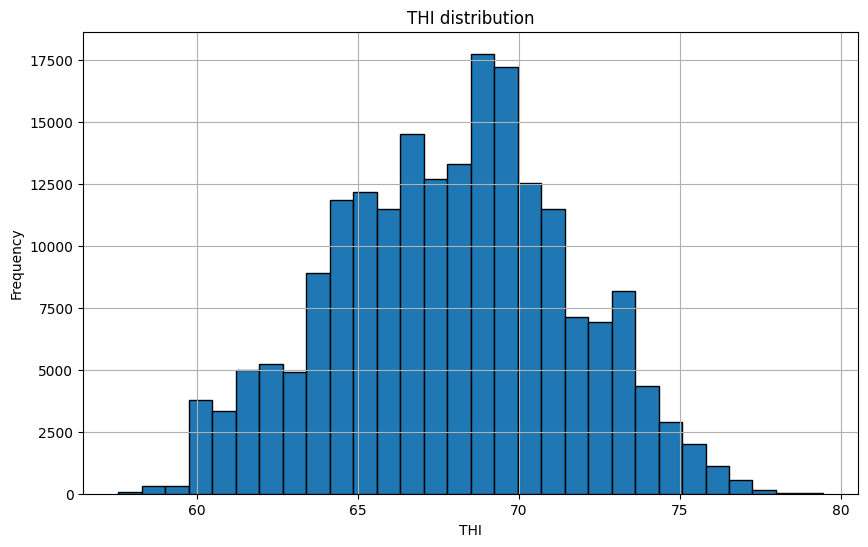

In [34]:
# 열의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_summer['불쾌지수'], bins=30, edgecolor='k')
plt.xlabel('THI')
plt.ylabel('Frequency')
plt.title('THI distribution')
plt.grid(True)
plt.show()

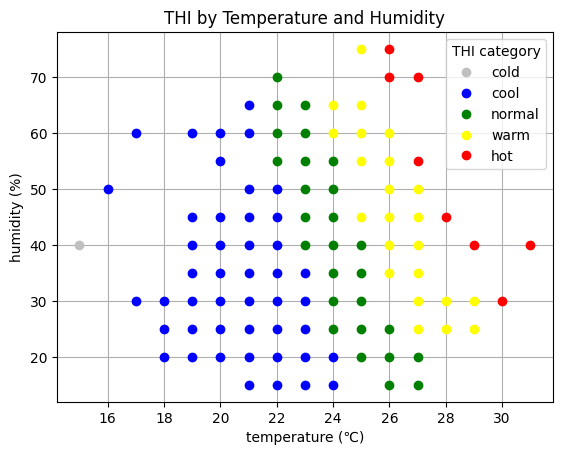

In [35]:
temperature = df_summer['운전석 온도']
humidity = df_summer['습도']

# temperature 열은 온도계 계측 8개 열 중 1개 사용/ 8개 열 : '운전석 온도', '보조석 온도', '뒷자석 온도(중앙)', '앞 루프 중앙', '앞 루프 좌측', '앞 루프 우측', '뒷 루프 좌측', '뒷 루프 우측'

temperature_points = range(int(temperature.min()), int(temperature.max()) + 1, 1)
humidity_points = range(int(humidity.min()), int(humidity.max()) + 1, 5)


# 불쾌지수 범주에 따른 색상 매핑
color_map = {'cold' : 'silver', 'cool': 'blue', 'normal': 'green', 'warm': 'yellow', 'hot': 'red'}

# 그래프 설정
fig, ax = plt.subplots()
ax.set_xlabel('temperature (℃)')
ax.set_ylabel('humidity (%)')
ax.set_title('THI by Temperature and Humidity')
# 불쾌지수 : Temperature Humidity Index, THI

# 각 온도와 습도 조합에 대해 점을 찍음
for temp in temperature_points:
    for hum in humidity_points:
        # 해당 온도와 습도에 가장 가까운 데이터 포인트 찾기
        subset = df_summer[(df_summer['운전석 온도'] == temp) & (df_summer['습도'] == hum)]
        
        if not subset.empty:
            category = subset['불쾌지수_범주'].values[0]
            color = color_map[category]
            ax.plot(temp, hum, 'o', color=color)  # 점의 색상 설정

for category, color in color_map.items():
    ax.plot([], [], 'o', color=color, label=category)

ax.legend(title='THI category')            

plt.grid(True)
plt.show()